In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function f and its derivative
f = lambda x, omega : np.exp(1j*omega*x)
df = lambda x, omega : 1j*omega*np.exp(1j*omega*x)

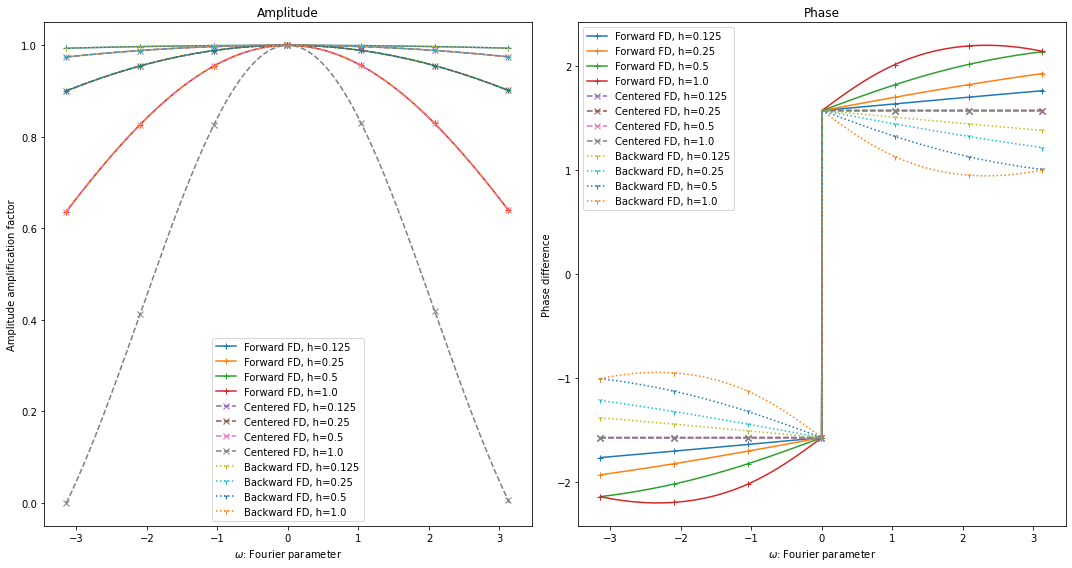

In [3]:
# Plot amplitude
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

N = 1024
X = np.linspace(-np.pi, np.pi, N, endpoint=True)
#X = np.linspace(0, np.pi, N, endpoint=True)
ref_style = {'linestyle': '--', 'color': 'black'}


"""
Different transfer functions
"""

# Exact transfer function
def T(omega, h=0):
    return 1j*omega\

# Forward FD transfer function
def T_forward(omega, h):
    return (np.exp(1j*omega*h) - 1)/h

# Centered FD transfer function
def T_centered(omega, h):
    return 1j*np.sin(omega*h)/h

# Backward FD transfer function
def T_backward(omega, h):
    return (1 - np.exp(-1j*omega*h))/h

h_ = [1.0]
"""
Try out different h_
"""
h_ = [0.125, 0.25, 0.5, 1.0]



def get_amplification_factor(a_exact, b_num):
    """
    a_exact: Evaluations of transfer functions for exact derivative
    b_num: Evaluations of transfer functions for numerical derivative
    """
    #############################################
    # Exercise a: START
    #############################################
    return np.abs(b_num)/np.abs(a_exact)
    #############################################
    # Exercise a: END
    #############################################
    return np.zeros_like(a_exact)



def get_phase_delta(a_exact, b_num):
    """
    a_exact: Evaluations of transfer functions for exact derivative
    b_num: Evaluations of transfer functions for numerical derivative
    """
    #############################################
    # Exercise b: START
    #############################################
    return np.arctan2(np.imag(a_exact),np.real(b_num))
    #############################################
    # Exercise b: END
    #############################################


##########################
# Amplitude
##########################

ax[0].set_title("Amplitude")
ax[0].set_xlabel('$\omega$: Fourier parameter')
ax[0].set_ylabel('Amplitude amplification factor')

if 0:
    # Reference: 1 value referring to no change
    Y = np.zeros_like(X)
    ax[0].plot(X, Y, **ref_style, label="No change in amplitude")

if 1:
    # Forward FD
    for h in h_:
        Y = get_amplification_factor(T(X), T_forward(X, h))
#         print(X)
#         print(Y)
        ax[0].plot(X, Y, label="Forward FD, h="+str(h), marker="+", markevery=N//6)

if 1:
    # Centered FD
    for h in h_:
        Y = get_amplification_factor(T(X), T_centered(X, h))
        ax[0].plot(X, Y, label="Centered FD, h="+str(h), marker="x", linestyle="--", markevery=N//6)

if 1:
    # Backward FD
    for h in h_:
        Y = get_amplification_factor(T(X), T_backward(X, h))
        ax[0].plot(X, Y, label="Backward FD, h="+str(h), marker="1", linestyle=":", markevery=N//6)

ax[0].legend()


##########################
# Phase
##########################
ax[1].set_title("Phase")
ax[1].set_xlabel('$\omega$: Fourier parameter')
ax[1].set_ylabel('Phase difference')


# Exact phase should be 0.0
t_exact = T(X)


if 1:
    # Forward FD
    for h in h_:
        t_num = T_forward(X, h)
        phase_delta = get_phase_delta(t_exact, t_num)
        ax[1].plot(X, phase_delta, label="Forward FD, h="+str(h), marker="+", markevery=N//6)

if 1:
    # Centered FD
    for h in h_:
        t_num = T_centered(X, h)
        phase_delta = get_phase_delta(t_exact, t_num)
        ax[1].plot(X, phase_delta, label="Centered FD, h="+str(h), marker="x", linestyle="--", markevery=N//6)

if 1:
    # Backward FD
    for h in h_:
        t_num = T_backward(X, h)
        phase_delta = get_phase_delta(t_exact, t_num)
        ax[1].plot(X, phase_delta, label="Backward FD, h="+str(h), marker="1", linestyle=":", markevery=N//6)

ax[1].legend()

fig.tight_layout()
plt.show()
fig.savefig("output_assignment_2_transfer_function.pdf")